In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
IMG_SIZE = 224
BATCH_SIZE = 32

In [10]:
# Please run the first code cell to import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [14]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/segmented_images/train',
target_size=(IMG_SIZE, IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='categorical',
subset='training'
 )

Found 4008 images belonging to 4 classes.


In [15]:
val_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/segmented_images/train',
target_size=(IMG_SIZE, IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='categorical',
subset='validation'
 )

Found 1001 images belonging to 4 classes.


In [16]:
class_indices=train_generator.class_indices
class_names=list(class_indices.keys())
print("Class indices:", class_indices)
print("Class names:", class_names)

Class indices: {'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}
Class names: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [17]:
model = keras.Sequential([
layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(IMG_SIZE, IMG_SIZE, 3)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(128, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(4, activation='softmax')
 ])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator,batch_size= BATCH_SIZE)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4709 - loss: 1.0958

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


129/129 ━━━━━━━━━━━━━━━━━━━━ 426s 3s/step - accuracy: 0.4714 - loss: 1.0951 - val_accuracy: 0.5906 - val_loss: 0.8873
Epoch 2/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 408s 3s/step - accuracy: 0.6524 - loss: 0.7999 - val_accuracy: 0.6417 - val_loss: 0.8002
Epoch 3/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 409s 3s/step - accuracy: 0.8077 - loss: 0.5046 - val_accuracy: 0.6575 - val_loss: 0.7463
Epoch 4/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 410s 3s/step - accuracy: 0.8892 - loss: 0.2932 - val_accuracy: 0.7480 - val_loss: 0.7211
Epoch 5/5
 46/129 ━━━━━━━━━━━━━━━━━━━━ 4:22 3s/step - accuracy: 0.9673 - loss: 0.0951

In [22]:
model.save('/content/drive/MyDrive/segmented_images/train.h5')

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt #visualisation
import numpy as np
model=load_model('/content/drive/MyDrive/segmented_images/train.h5')
print("Model Loaded")

Model Loaded


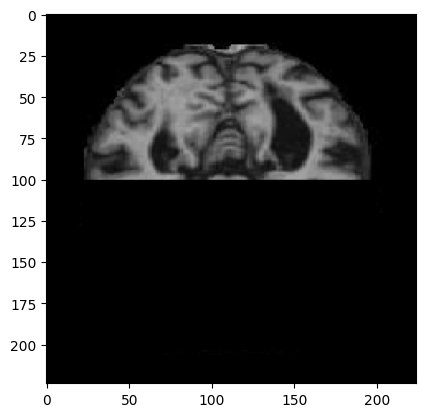

In [24]:
test_image_path="/content/drive/MyDrive/segmented_images/train/MildDemented/mildDem0.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [25]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 25

In [26]:
prediction=model.predict(img_array)
ind=np.argmax(prediction)
prediction=prediction[0][ind]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


In [30]:
predicted_class=class_names[ind]
print(" Predicted class:", predicted_class)


 Predicted class: NonDemented


In [31]:
if predicted_class == "NonDemented":
 print(" You do NOT have Alzheimer’s.")
else:
 print(" Alzheimer’s stage detected:" )
 {predicted_class}

 You do NOT have Alzheimer’s.
